## Data Science And Business Analytics
## The Spark Foundation
### Author : Vaibhav Vispute
### Task 1
#### Prediction Using Supervised ML
#### Predict the percentage of a Student based on the no. of study hours

In [40]:
#Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [26]:
#Importing the data
df = pd.read_csv("student_scores - student_scores.csv")

In [27]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


First 10 records of the dataset

In [28]:
df.shape

(25, 2)

#### 25 records and 2 columns are present in our dataset

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [30]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool

#### There are no Missing or Duplicate records in the given dataset

### Plotting the distribution of datapoints for finding out the relationship between the data

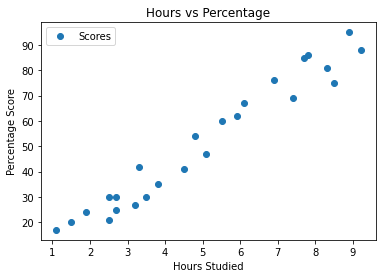

In [31]:
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### Preparing the Data

In [34]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

### Model Training

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=0)


In [55]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print("Training Complete")

Training Complete


### Plotting the Regression Line i.e., Best Fit line 

In [56]:
line = regressor.coef_*x+regressor.intercept_

Text(0.5, 1.0, 'Plotting the Regression Line')

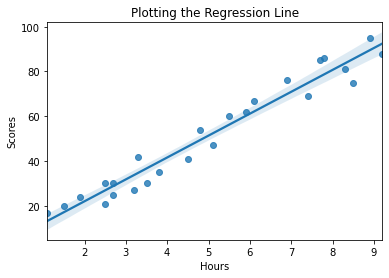

In [57]:
#Plotting for the test data
sns.regplot(x= "Hours", y = "Scores", data = df)
plt.title("Plotting the Regression Line")

### Making Predictions

In [58]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [60]:
# Comparing Actual vs Predicted
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


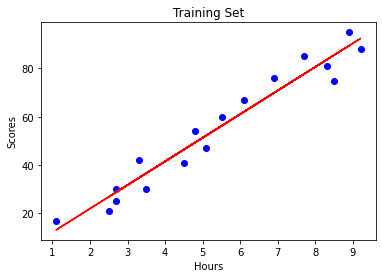

In [61]:
#let's Visualize the actual score and Predicted Score
#Plotting the training set
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, regressor.predict(x_train), color='red')
plt.title('Training Set')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### calculate the coeffiecient of the simple linear regression: y= mx+c (m=slope and c=intercept)

In [63]:
mean_x = np.mean(df['Hours'])
mean_y = np.mean(df['Scores'])
num = 0
den = 0
x = list(df['Hours'])
y = list(df['Scores'])
for i in range(len(df)):
    num += (x[i] - mean_x)*(y[i] - mean_y)
    den += (x[i] - mean_x)**2
B1 = num/den

In [64]:
B0 = mean_y - B1*mean_x

In [66]:
df['Pred_Scores'] = B0 + B1*df['Hours']

In [67]:
df.head(10)

,Hours,Scores,Pred_Scores
0,2.5,21,26.923182
1,5.1,47,52.340271
2,3.2,27,33.766244
3,8.5,75,85.578002
4,3.5,30,36.698985
5,1.5,20,17.147378
6,9.2,88,92.421065
7,5.5,60,56.250592
8,8.3,81,83.622842
9,2.7,25,28.878343


[]

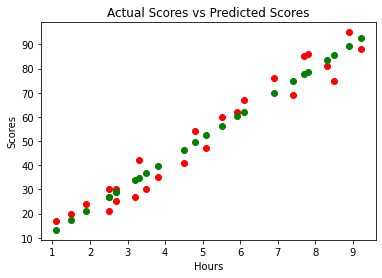

In [70]:
plt.scatter(df['Hours'], df['Scores'], c = 'red', label='ACtual Marks')
plt.scatter(df['Hours'], df['Pred_Scores'], c='green', label = 'Predicted Marks')
plt.title('Actual Scores vs Predicted Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.plot()

In [74]:
#Testing the result with our data
y = B0 + B1*9.25
print("Marks Scored by Student Who Study 9.25 hrs/ day is ",y)

Marks Scored by Student Who Study 9.25 hrs/ day is  92.90985477015732


### Evaluating The Model

This perticular step is important to compare how well different algorithm perform on perticular dataset.
For the regression problem it is the way to check accuracy of the model so, here we will check the error value i.e., the difference between actual data point and predicted points. The R-2 value we get between 0 to 1.
If the Value is nearer to 1 then your regression line is best fitted to your model very nicely
so we'll check the R-2 error

In [75]:
from sklearn import metrics

In [76]:
print('R-2: ', metrics.r2_score(y_test, y_pred))

R-2:  0.9568211104435257


#### Here we get the R-2 score 0.956 so we can say our model is best fit model